In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

start="2022-01-01"

assets = ["BNP.PA","ACA.PA","ORA.PA"]
data = yf.download(assets,start=start)

[*********************100%***********************]  3 of 3 completed


In [4]:
data.head()

Price           Close                            High                       \
Ticker         ACA.PA     BNP.PA    ORA.PA     ACA.PA     BNP.PA    ORA.PA   
Date                                                                         
2022-01-03   9.838484  49.939327  7.713046   9.894095  50.175969  7.771155   
2022-01-04  10.071740  51.612133  7.767063  10.152067  52.011975  7.807985   
2022-01-05  10.172150  51.677410  7.734324  10.297274  52.444448  7.791616   
2022-01-06  10.289550  52.379173  7.719594  10.297274  52.493413  7.744966   
2022-01-07  10.393047  52.632130  7.717137  10.440934  52.648447  7.740054   

Price             Low                            Open                       \
Ticker         ACA.PA     BNP.PA    ORA.PA     ACA.PA     BNP.PA    ORA.PA   
Date                                                                         
2022-01-03   9.731897  49.776126  7.708135   9.747344  49.865887  7.719593   
2022-01-04   9.894095  50.306531  7.743328   9.894095  50.331010  7.743328   
2022-01-05  10.070196  51.677410  7.694221  10.098002  51.824288  7.782613   
2022-01-06  10.040846  51.244928  7.678672  10.111904  51.391808  7.734326   
2022-01-07  10.277191  51.889568  7.667212  10.303452  52.224129  7.721230   

Price        Volume                     
Ticker       ACA.PA   BNP.PA    ORA.PA  
Date                                    
2022-01-03  4846202  2177649   6450743  
2022-01-04  6062208  3614427   8585931  
2022-01-05  6300320  3910434   9980707  
2022-01-06  7442277  3645405  10120682  
2022-01-07  8210181  3446590   6559974

In [5]:
# calcul des rendements (actuel - précedent / précédent)
returns = data["Close"].pct_change().dropna()
returns

Ticker,ACA.PA,BNP.PA,ORA.PA
Date,,,
2022-01-04,0.023709,0.033497,0.007003
2022-01-05,0.009969,0.001265,-0.004215
2022-01-06,0.011541,0.013580,-0.001904
2022-01-07,0.010059,0.004829,-0.000318
2022-01-10,0.005351,-0.007752,0.021211
...,...,...,...
2024-12-23,0.001153,-0.000696,0.003388
2024-12-24,-0.008829,0.001741,0.002744
2024-12-27,0.024400,0.017379,0.008840


In [6]:
  ## assets_stats function
#The method used to estimate the expected returns hist historical estimates.
method_mu  = "hist"

#The method used to estimate the covariance matrix , historical estimates.
method_cov  = "hist"


 ## Optimization function
#The model used for optimize the portfolio 'Classic', 'BL', 'FM' or 'BLFM'
model ="Classic" 

#The risk measure used to optimize the portfolio.Standard Deviation.
risk_measure = "MV"

#Objective function of the optimization model. 'MinRisk', 'Utility', 'Sharpe' or 'MaxRet'
obj='Sharpe'

#Risk free rate,Risk aversion factor, kind of return
rf=0 
l=0
hist=True


## Optimize

In [7]:
port = rp.Portfolio(returns=returns)

#Calculate the inputs that will be used by the optimization method
port.assets_stats(method_mu,method_cov)

#This method that calculates the optimal portfolio according to the optimization model
weight = port.optimization(model=model,rm=risk_measure,rf=rf,l=l,hist=hist)

In [8]:
weight

,weights
ACA.PA,3.565787e-01
BNP.PA,6.783006e-11
ORA.PA,6.434213e-01


ACA.PA (Crédit Agricole) : Reçoit un poids de 1.0, ce qui signifie que tout le capital doit être investi dans cet actif.  
BNP.PA (BNP Paribas) : Reçoit un poids extrêmement faible (5.98 × 10⁻¹⁰, pratiquement 0).

## Plotting

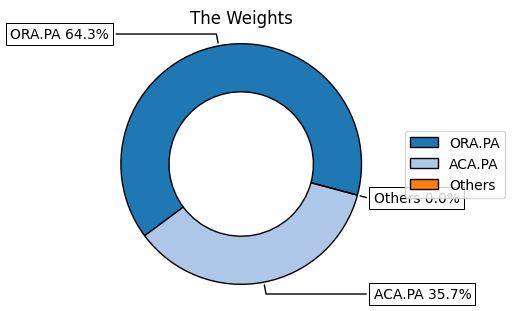

In [18]:
ax = rp.plot_pie(w = weight,title="The Weights",height=3,width =5)